In [1]:
# -*- coding: 'utf-8' -*-

import pandas as pd

sensor_id = [1, 2, 3]
file_name = "lora{}_2017.csv".format(sensor_id[2])

### Data Preprocessing

In [2]:
df = pd.read_csv(file_name, encoding='utf-8')
col = df.columns
df.head()

,日期時間,土壤濕度01 (%),土壤導電度 (μS/cm),土壤溫度01 (°C),土壤濕度02 (%),土壤溫度02 (°C),土壤酸鹼值 (pH)
2017-09-13 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-21 09:15:28,1.14,0.0,24.8,1.25,25.0,6.12,NaN
2017-11-21 09:30:28,1.14,0.0,24.9,1.24,25.1,6.04,NaN
2017-11-21 09:45:28,1.14,0.0,24.9,1.24,25.1,6.04,NaN
2017-11-21 10:00:28,1.13,0.0,24.9,1.24,25.1,6.03,NaN


In [3]:
df1 = df.reset_index()
df1.head()

,index,日期時間,土壤濕度01 (%),土壤導電度 (μS/cm),土壤溫度01 (°C),土壤濕度02 (%),土壤溫度02 (°C),土壤酸鹼值 (pH)
0,2017-09-13 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-21 09:15:28,1.14,0.0,24.8,1.25,25.0,6.12,NaN
2,2017-11-21 09:30:28,1.14,0.0,24.9,1.24,25.1,6.04,NaN
3,2017-11-21 09:45:28,1.14,0.0,24.9,1.24,25.1,6.04,NaN
4,2017-11-21 10:00:28,1.13,0.0,24.9,1.24,25.1,6.03,NaN


In [4]:
df2 = df1.drop(df1.columns[-1], axis=1)
df2.head()

,index,日期時間,土壤濕度01 (%),土壤導電度 (μS/cm),土壤溫度01 (°C),土壤濕度02 (%),土壤溫度02 (°C)
0,2017-09-13 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-21 09:15:28,1.14,0.0,24.8,1.25,25.0,6.12
2,2017-11-21 09:30:28,1.14,0.0,24.9,1.24,25.1,6.04
3,2017-11-21 09:45:28,1.14,0.0,24.9,1.24,25.1,6.04
4,2017-11-21 10:00:28,1.13,0.0,24.9,1.24,25.1,6.03


In [5]:
df2.columns = col
df2.head()

,日期時間,土壤濕度01 (%),土壤導電度 (μS/cm),土壤溫度01 (°C),土壤濕度02 (%),土壤溫度02 (°C),土壤酸鹼值 (pH)
0,2017-09-13 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-21 09:15:28,1.14,0.0,24.8,1.25,25.0,6.12
2,2017-11-21 09:30:28,1.14,0.0,24.9,1.24,25.1,6.04
3,2017-11-21 09:45:28,1.14,0.0,24.9,1.24,25.1,6.04
4,2017-11-21 10:00:28,1.13,0.0,24.9,1.24,25.1,6.03


In [6]:
col = list(df2)
col[0] = "Datetime"
col[1], col[2] = col[2], col[1]
df2.columns = col
df2.columns

Index(['Datetime', '土壤導電度 (μS/cm)', '土壤濕度01 (%)', '土壤溫度01 (°C)', '土壤濕度02 (%)',
       '土壤溫度02 (°C)', '土壤酸鹼值 (pH)'],
      dtype='object')

In [7]:
df2.head()

,Datetime,土壤導電度 (μS/cm),土壤濕度01 (%),土壤溫度01 (°C),土壤濕度02 (%),土壤溫度02 (°C),土壤酸鹼值 (pH)
0,2017-09-13 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-21 09:15:28,1.14,0.0,24.8,1.25,25.0,6.12
2,2017-11-21 09:30:28,1.14,0.0,24.9,1.24,25.1,6.04
3,2017-11-21 09:45:28,1.14,0.0,24.9,1.24,25.1,6.04
4,2017-11-21 10:00:28,1.13,0.0,24.9,1.24,25.1,6.03


In [8]:
# pd.to_datetime(df2['日期時間'], format='%Y-%m-%d %H:%M')
df3 = df2
df3.Datetime = pd.to_datetime(df3.Datetime)
df4 = df3.loc[1:]
df4.head()

,Datetime,土壤導電度 (μS/cm),土壤濕度01 (%),土壤溫度01 (°C),土壤濕度02 (%),土壤溫度02 (°C),土壤酸鹼值 (pH)
1,2017-11-21 09:15:28,1.14,0.0,24.8,1.25,25.0,6.12
2,2017-11-21 09:30:28,1.14,0.0,24.9,1.24,25.1,6.04
3,2017-11-21 09:45:28,1.14,0.0,24.9,1.24,25.1,6.04
4,2017-11-21 10:00:28,1.13,0.0,24.9,1.24,25.1,6.03
5,2017-11-21 10:15:28,1.14,0.0,24.9,1.24,25.1,5.94


In [9]:
df4.set_index(df4.Datetime, inplace=True)
df4.head()

,Datetime,土壤導電度 (μS/cm),土壤濕度01 (%),土壤溫度01 (°C),土壤濕度02 (%),土壤溫度02 (°C),土壤酸鹼值 (pH)
Datetime,,,,,,,
2017-11-21 09:15:28,2017-11-21 09:15:28,1.14,0.0,24.8,1.25,25.0,6.12
2017-11-21 09:30:28,2017-11-21 09:30:28,1.14,0.0,24.9,1.24,25.1,6.04
2017-11-21 09:45:28,2017-11-21 09:45:28,1.14,0.0,24.9,1.24,25.1,6.04
2017-11-21 10:00:28,2017-11-21 10:00:28,1.13,0.0,24.9,1.24,25.1,6.03
2017-11-21 10:15:28,2017-11-21 10:15:28,1.14,0.0,24.9,1.24,25.1,5.94


### Visulization

In [10]:
df2.head()

,Datetime,土壤導電度 (μS/cm),土壤濕度01 (%),土壤溫度01 (°C),土壤濕度02 (%),土壤溫度02 (°C),土壤酸鹼值 (pH)
0,2017-09-13 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-21 09:15:28,1.14,0.0,24.8,1.25,25.0,6.12
2,2017-11-21 09:30:28,1.14,0.0,24.9,1.24,25.1,6.04
3,2017-11-21 09:45:28,1.14,0.0,24.9,1.24,25.1,6.04
4,2017-11-21 10:00:28,1.13,0.0,24.9,1.24,25.1,6.03


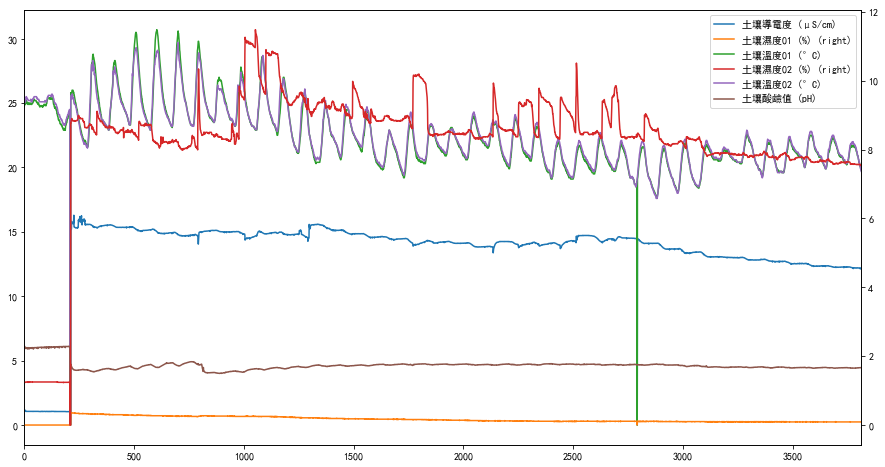

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm

font_path = "/codetmp/johan/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf"
prop = mfm.FontProperties(fname=font_path)

df2.drop('Datetime', axis=1).plot(secondary_y=['土壤濕度01 (%)', '土壤濕度02 (%)'], figsize=(15,8))
# df3.plot(secondary_y=['土壤濕度01 (%)', '土壤濕度02 (%)'], figsize=(15,8))
plt.show()

In [12]:
df2.head()

,Datetime,土壤導電度 (μS/cm),土壤濕度01 (%),土壤溫度01 (°C),土壤濕度02 (%),土壤溫度02 (°C),土壤酸鹼值 (pH)
0,2017-09-13 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-21 09:15:28,1.14,0.0,24.8,1.25,25.0,6.12
2,2017-11-21 09:30:28,1.14,0.0,24.9,1.24,25.1,6.04
3,2017-11-21 09:45:28,1.14,0.0,24.9,1.24,25.1,6.04
4,2017-11-21 10:00:28,1.13,0.0,24.9,1.24,25.1,6.03


In [13]:
df3.head()

,Datetime,土壤導電度 (μS/cm),土壤濕度01 (%),土壤溫度01 (°C),土壤濕度02 (%),土壤溫度02 (°C),土壤酸鹼值 (pH)
0,2017-09-13 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-21 09:15:28,1.14,0.0,24.8,1.25,25.0,6.12
2,2017-11-21 09:30:28,1.14,0.0,24.9,1.24,25.1,6.04
3,2017-11-21 09:45:28,1.14,0.0,24.9,1.24,25.1,6.04
4,2017-11-21 10:00:28,1.13,0.0,24.9,1.24,25.1,6.03
